## 0. Standard Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Reading File

In [2]:
# Read the data
training_data = pd.read_csv('./Datasets/train.csv', encoding = 'latin')
test_data = pd.read_csv('./Datasets/test.csv', encoding = 'latin', index_col='Index')

pd.set_option('max_columns', None)
training_data.head(10)

,Source,Host,Link,Date(ET),Time(ET),time(GMT),Title,TRANS_CONV_TEXT,Patient_Tag
0,FORUMS,cafepharma.com,http://cafepharma.com/boards/threads/epstein.5...,6/15/2016,13:58:00,6/15/2016 23:28,Epstein,I don't disagree with you in principle. I'm ju...,0
1,FORUMS,www.patient.co.uk,http://www.patient.co.uk/forums/discuss/enlarg...,5/7/2016,0.820833333,42498.21667,Enlarged Heart.Thread Enlarged Heart,I am always dizzy I get dizzy standing up so I...,1
2,BLOG,http://abcnewsradioonline.com/entertainment-news,http://abcnewsradioonline.com/entertainment-ne...,4/14/2016,15:00:38,4/15/2016 0:30,Queen Latifah Joins American Heart Association...,Axelle/Bauer-Griffin/FilmMagic(NEW YORK) -- Qu...,0
3,FORUMS,www.cancer-forums.net,http://www.cancer-forums.net/viewtopic.php?f=1...,6/18/2016,20:46:00,6/19/2016 6:16,Bulaemia,I am 17 and I have been throwing up for about ...,1
4,FORUMS,www.diyaudio.com,http://www.diyaudio.com/forums/lounge/292252-d...,6/15/2016,3:26:00,6/15/2016 12:56,DIY Silver interconnects and RCAs???,Quote: Originally Posted by Boyan Silyavski Wa...,0
5,FORUMS,forum.cyclinguk.org,http://forum.cyclinguk.org/viewtopic.php?f=24&...,4/6/2016,5:50:00,4/6/2016 15:20,Personal Question,Theres a discussion about recumbent power on B...,0
6,FORUMS,www.reddit.com,https://www.reddit.com/r/todayilearned/comment...,5/2/2016,0.047916667,42492.44375,TIL that CVS took a $2 billion hit to annual s...,Of course! I just got diagnosed with congestiv...,1
7,BLOG,http://quranfruitz.blogspot.com,http://quranfruitz.blogspot.com/2016/02/causes...,2/28/2016,3:20:00,2/28/2016 13:50,Causes of Low Blood Pressure(Hypo tension),Blood pressure is a measurement of the pressur...,0
8,FORUMS,hmnews.org,http://hmnews.org/health-care-news/cluster8641...,6/15/2016,17:16:00,6/16/2016 2:46,Sleep disorders may predict heart events after...,Other Sleep disorders may predict heart events...,0
9,FORUMS,www.cafepharma.com,http://www.cafepharma.com/boards/threads/nomin...,4/29/2016,23:46:00,4/30/2016 9:16,Nominations for worst manager at Novartis,worse manager ever??? LS out of Richmond. Ugh!...,0


In [3]:
pd.set_option('max_columns', None)
test_data.head(10)

,Source,Host,Link,Date(ET),Time(ET),time(GMT),Title,TRANS_CONV_TEXT
Index,,,,,,,,
1,BLOG,uhmagonline.com,http://uhmagonline.com/son-of-the-late-kimbo-s...,7/30/2016,00:41:23,NaN,NaN,"Baby Slice, the son of the late Kimbo Slice, h..."
2,FORUMS,implantinformationnetwork.yuku.com,http://implantinformationnetwork.yuku.com/topi...,6/20/2016,00:07:30,6/20/2016 9:37,My Story --,"<p><font face=""sans-serif"" size=""3"">I have had..."
3,BLOG,http://cestlapharm.blogspot.com,http://cestlapharm.blogspot.com/2016/06/us-fda...,6/15/2016,15:44:00,6/16/2016 1:14,US FDA ?????canagliflozin?dapagliflozin?????????,"Previously, sodium-glucose cotransporter-2 (SG..."
4,FORUMS,healthboards.com,http://www.healthboards.com/boards/heart-disor...,7/17/2016,19:41:00,NaN,NaN,Hello. I suffer from congestive heart failure ...
5,BLOG,http://www.sciencecodex.com,http://www.sciencecodex.com/vitamin_d_improves...,04-04-2016,15:30:45,04-05-2016 01:00,"Vitamin D improves heart function, study finds",A daily dose of vitamin D3 improves heart func...
6,Facebook,NaN,http://facebook.com/55779104577_10154506997494578,04-04-2016,12:04 PM,04-04-2016 12:04,NaN,"""reuters.com A stem cell therapy developed by ..."
7,FORUMS,foros.internautas.org,http://foros.internautas.org/viewtopic.php?t=4...,4/28/2016,21:19:00,4/29/2016 6:49,TODO SOBRE GSM,"Sorry, I ran out of credit http://www.buffaloi..."
8,FORUMS,icdsupportgroup.org,http://www.icdsupportgroup.org/board/viewtopic...,7/20/2016,07:15:00,NaN,NaN,The sun will come out tomorrow....But for peop...
9,BLOG,http://human-diagrams.blogspot.com,http://human-diagrams.blogspot.com/2016/06/pat...,6/15/2016,06:14:00,6/15/2016 15:44,Pathophysiology of Heart failure,Pathophysiology of Heart failure


## 2. Data Cleaning

### A. Missing Value Imputation and Feature Selection

Conversatiuon Link and Website URL do not add significant information to out classification task.  

Date doesnot have any relevence as we are tracking general patients and not seasonal effect of any disease.  
Time might have been a good indicator, but since the time is taken from a fixed reference and not in local time, and we have no information about poster's location; Time sadly also does not add much value to the task in hand.  

So we can drop these features from out dataframe.

In [4]:
training_data.drop(['Date(ET)', 'Time(ET)', 'time(GMT)', 'Link', 'Host'], axis=1, inplace=True)
test_data.drop(['Date(ET)', 'Time(ET)', 'time(GMT)', 'Link', 'Host'], axis=1, inplace=True)

Also, if there is any data points with missing labels or missing conversation, we can not do much with that particular data until out model is trained. So we can eliminate those points also.

In [5]:
training_data.dropna(axis=0, subset=['Patient_Tag'], inplace=True)
all_columns = training_data.columns

In [6]:
training_data.dropna(axis=0, subset=['TRANS_CONV_TEXT'], inplace=True)

After all that, let us see what else is missing from our dataset...

There are 1 columns with missing values in the training data.


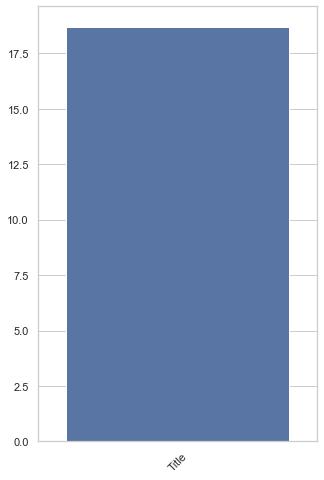

In [7]:
sns.set(style="whitegrid")

nulls_train = np.sum(training_data.isnull())
nullcols_train = nulls_train.loc[(nulls_train != 0)].sort_values(ascending=False)
nullcols_train = nullcols_train.apply(lambda x: 100*x/training_data.shape[0])

barplot_dim = (5, 8)
ax = plt.subplots(figsize=barplot_dim)
plt.xticks(rotation=45)
sns.barplot(x=nullcols_train.index, y=nullcols_train)
print('There are', len(nullcols_train), 'columns with missing values in the training data.')

In [8]:
training_data[training_data['Title'].isnull()].head(10)

,Source,Title,TRANS_CONV_TEXT,Patient_Tag
10,FORUMS,NaN,Looknsee Photography wrote: When I was living ...,1
18,FORUMS,NaN,Originally Posted by Birddog Cause of death wa...,0
25,BLOG,NaN,"STILLWATER, Okla. (AP) ? Medical examiner spok...",0
34,BLOG,NaN,"I am so, so, so congested. I am not feeling we...",1
35,Facebook,NaN,""" Had lost a lot of weight then in no time st...",1
38,FACEBOOK,NaN,Matthew 25 31 When the Son of man shall come i...,1
40,Facebook,NaN,""" I WUD LIKE TO THANK MY EMPLOYER FOR CANCELL...",1
49,FORUMS,NaN,Quote: Originally Posted by winston53660 Actua...,1
51,Facebook,NaN,"""expi.co Nancy Davis Reagan, the widow of Pres...",0
53,FORUMS,NaN,"Hi Pat, it's many, many years since I had my E...",1


Okay, so missing tiltles can be assumed as blank and replaced with ' ' to signify the missing title; and can easily be tracked/filtered downstream of the pipeline.

In [9]:
training_data['Title'].fillna(' ', inplace=True);
test_data['Title'].fillna(' ', inplace=True);

In [10]:
training_data['Combined_CONV_text'] = training_data['Title'] + '. ' + training_data['TRANS_CONV_TEXT'] + '. ' + training_data['Source']
test_data['Combined_CONV_text'] = test_data['Title'] + '. ' + test_data['TRANS_CONV_TEXT'] + '. ' + test_data['Source']

training_data.drop(['Title', 'TRANS_CONV_TEXT'], axis=1, inplace=True)
test_data.drop(['Title', 'TRANS_CONV_TEXT'], axis=1, inplace=True)

In [11]:
nulls_train = np.sum(training_data.isnull())
nulls_train

Source                0
Patient_Tag           0
Combined_CONV_text    0
dtype: int64

In [12]:
nulls_test = np.sum(test_data.isnull())
nulls_test

Source                0
Combined_CONV_text    0
dtype: int64

### B. Feature Cleaning

Since the data is scraped from web; there is a chance that HTML tags and unnecessary punctuations(Thanks Millenials!) have crept into the dataset along with useful data; we can get rid of those with two simple functions.

In [13]:
from bs4 import BeautifulSoup

def remove_html_tags(text):
    soup = BeautifulSoup(text, 'lxml')
    only_text = soup.get_text()
    return only_text

In [14]:
import string

def remove_punctuation(text):
    text_without_punctuation = ''.join([k for k in text if k not in string.punctuation])
    text_without_punctuation = text_without_punctuation
    return text_without_punctuation

In [15]:
training_data['Combined_CONV_text'] = training_data['Combined_CONV_text'].apply(lambda x: remove_html_tags(x))
test_data['Combined_CONV_text'] = test_data['Combined_CONV_text'].apply(lambda x: remove_html_tags(x))

training_data['Combined_CONV_text'] = training_data['Combined_CONV_text'].apply(lambda x: remove_punctuation(x))
test_data['Combined_CONV_text'] = test_data['Combined_CONV_text'].apply(lambda x: remove_punctuation(x))

In [16]:
training_data.head(10)

,Source,Patient_Tag,Combined_CONV_text
0,FORUMS,0,Epstein I dont disagree with you in principle ...
1,FORUMS,1,Enlarged HeartThread Enlarged Heart I am alway...
2,BLOG,0,Queen Latifah Joins American Heart Association...
3,FORUMS,1,Bulaemia I am 17 and I have been throwing up f...
4,FORUMS,0,DIY Silver interconnects and RCAs Quote Origin...
5,FORUMS,0,Personal Question Theres a discussion about re...
6,FORUMS,1,TIL that CVS took a 2 billion hit to annual sa...
7,BLOG,0,Causes of Low Blood PressureHypo tension Blood...
8,FORUMS,0,Sleep disorders may predict heart events after...
9,FORUMS,0,Nominations for worst manager at Novartis wors...


## 3. EDA

### A. Class Imbalance Study  
A highly unbalanced class can result in insufficient data regarding the minor class and improper learning by the machine learning algorithm. To tackle which we can use Oversampling and Undersampling techniques. But first, we need to see what we are dealing with...

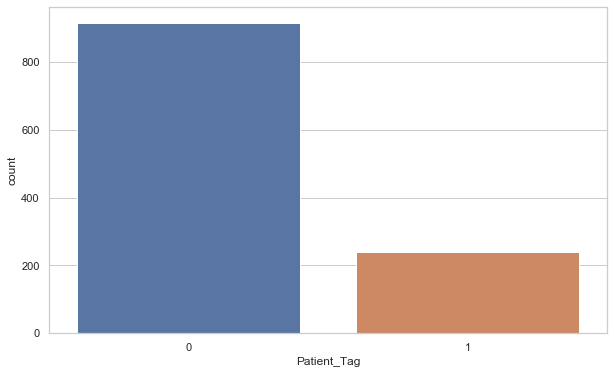

In [33]:
barplot_dim = (10, 6)
ax = plt.subplots(figsize=barplot_dim)
sns.countplot(x='Patient_Tag', data=training_data)

This is a slightly imbalanced data-set. Nothing too bad. No need to be worried.

### B. Social Media Strength  
We can gaze the relevance of different domains/media to patient tags and prefrerably identify which social media platform do patients prefer the most for discussion or posting. This might add a value to the importance of that social media while trying to identify patients from that particular platform.

In [34]:
training_data['Source'] = training_data['Source'].apply(lambda x: x.upper())

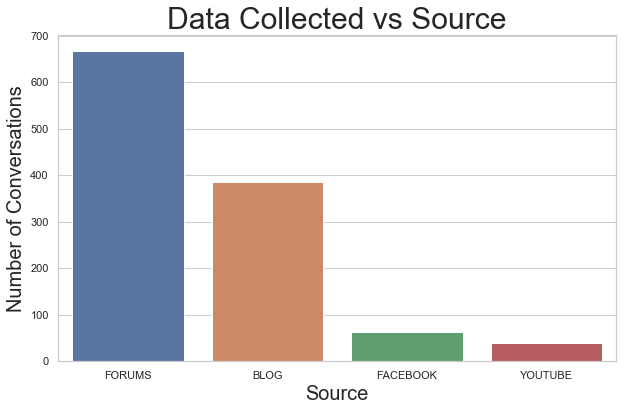

In [35]:
barplot_dim = (10, 6)
ax = plt.subplots(figsize=barplot_dim)
ax = sns.countplot(x='Source', data=training_data)
ax.set_ylabel('Number of Conversations',size=20)
ax.set_xlabel('Source',size=20)
ax.set_title('Data Collected vs Source',size=30);

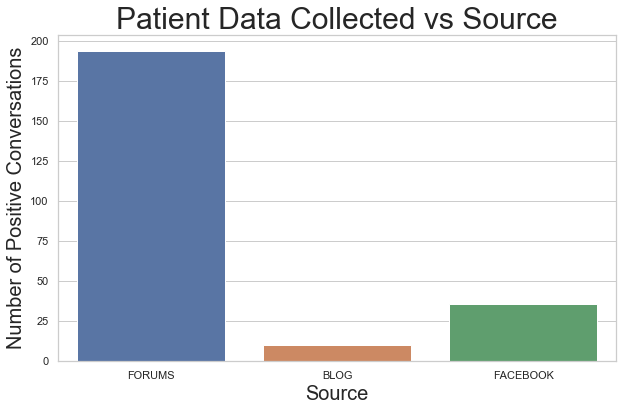

In [36]:
positive_patient_data = training_data[training_data['Patient_Tag']==1]

barplot_dim = (10, 6)
ax = plt.subplots(figsize=barplot_dim)
ax = sns.countplot(x='Source', data=positive_patient_data)
ax.set_ylabel('Number of Positive Conversations',size=20)
ax.set_xlabel('Source',size=20)
ax.set_title('Patient Data Collected vs Source',size=30);

In [37]:
total_posts_per_platform = dict(training_data['Source'].value_counts())
total_positive_posts_per_platform = dict(positive_patient_data['Source'].value_counts())
positive_percentage = {}

for key in total_posts_per_platform:
    try:
        positive_percentage[key] = (total_positive_posts_per_platform[key]/total_posts_per_platform[key])*100
    except:
        pass

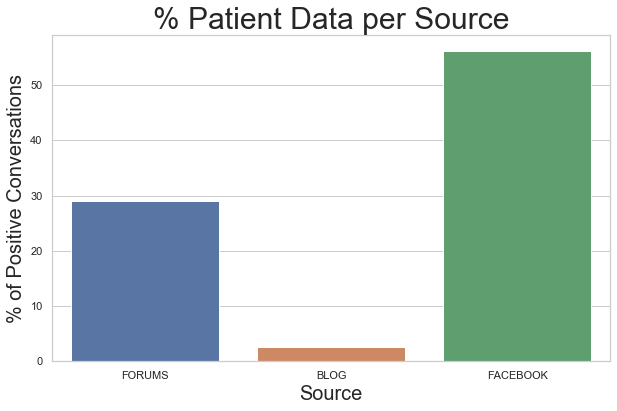

In [38]:
barplot_dim = (10, 6)
ax = plt.subplots(figsize=barplot_dim)
ax = sns.barplot(x=list(positive_percentage.keys()), y=list(positive_percentage.values()), palette=['C0', 'C1', 'C2'])
ax.set_ylabel('% of Positive Conversations',size=20)
ax.set_xlabel('Source',size=20)
ax.set_title('% Patient Data per Source',size=30);

### C. Scatter Text  
Scatter of the words used in our corpus with respect to their relevant tags would provide key informations like:-  
"What words are most common identifiers of a patient?"  
"What words have no relevance to the patient at all?"

In [39]:
# import scattertext as st

# corpus_dataframe = training_data.copy(deep=True)
# corpus_dataframe['Patient_Tag'] = corpus_dataframe['Patient_Tag'].apply(lambda x: 'Patient' if x==1 else 'Not Patient')
# corpus_dataframe['Combined_CONV_text'] = corpus_dataframe['Combined_CONV_text'].apply(nlp)

# corpus = st.CorpusFromParsedDocuments(corpus_dataframe,
#                                       category_col='Patient_Tag',
#                                       parsed_col='Combined_CONV_text').build()

C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


In [40]:
# html = st.produce_scattertext_explorer(corpus,
#                                        category='Patient',
#                                        category_name='Patient',
#                                        not_category_name='Not Patient')

I am using Pandas 1.0; so this implementation of scatter text was giving some errors; on running the same code in Pandas 0.8 using the Google Colab environment, this is the result.

![alt text](Scatter_text.png 'Iterations and_Threshold Tuning Summary')  

Since we see I, Me etc are major identifiers of a patient speaking about themselves; doing stop-word removal (which is a essential step in most of the NLP problems) might actually hamper our predictions due to loss of key information.

## 4. Feature Engineering

### A. Train-Validation Split  
Before we do any transformation operations on the data; it is advisabvle to split it into Train and Validation sets to avoid any leakage. So that we can treat out validation data as purely unknown data for our model and out features.

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(training_data.drop(['Patient_Tag', 'Source'], axis=1),
                                                      training_data['Patient_Tag'], test_size=0.3, random_state=0,
                                                      stratify=training_data['Patient_Tag'],shuffle=True)

In [18]:
X_test = test_data

In [19]:
X_train.head(10)

,Combined_CONV_text
848,VERSAILLES HEALTH CARE CENTER CELEBRATES NATIO...
489,Exercise Pathophysiology of Heart Failure 4 P...
262,Right side heart valves slower Thats what Ive ...
550,Heart failure survivor here Diagnosed at 32...
1101,Irregular heart beats after a gram of coke las...
569,uMusai on Bridgehead customers tried to restr...
269,Matthew 25 44 Then shall they also answer h...
217,Monitise Share Chat Chat About MONI Shares S...
628,Cardiologue Hf Avignon CARDIOLOGIST H F 84 8...
826,Anyone take blood pressure medication Re Anyon...


In [20]:
X_valid.head(10)

,Combined_CONV_text
691,Bellator 156 ExFresno State wrestler returns t...
749,Maverick try drinking Gatorade You arent gett...
16,How big is the ALS market Anybody thats not ...
537,45000 people die every year due lack of access...
167,Update I have been taking it by pill also thi...
34,I am so so so congested I am not feeling well...
194,Social isolation isnt good for heart failure p...
293,Description How To Prevent Congestive Heart F...
350,Desktop Thread too much salt leads to heart fa...
286,Pharmacologic Trends of Heart Failure Pharmaco...


In [21]:
X_test.head(10)

,Source,Combined_CONV_text
Index,,
1,BLOG,Baby Slice the son of the late Kimbo Slice ha...
2,FORUMS,My Story I have had both silicone and salinef...
3,BLOG,US FDA canagliflozindapagliflozin Previously s...
4,FORUMS,Hello I suffer from congestive heart failure ...
5,BLOG,Vitamin D improves heart function study finds ...
6,Facebook,reuterscom A stem cell therapy developed by V...
7,FORUMS,TODO SOBRE GSM Sorry I ran out of credit httpw...
8,FORUMS,The sun will come out tomorrowBut for people ...
9,BLOG,Pathophysiology of Heart failure Pathophysiolo...


### B. Text Preparation  
We need to convert words to their basic form and get rid of capitalization, numbers and extra spaces that add no real meaning to the information about the chatter.

In [22]:
import re

def prepare_text(text):
    #convert all to lowercase
    text = str(text).lower()
    
    #remove numbers
    text = re.sub(r'\d+', '', text)
    
    #remove extra white spaces
    text = text.strip()
    
    return text

In [23]:
X_train['Combined_CONV_text'] = X_train['Combined_CONV_text'].apply(lambda x: prepare_text(x))
X_valid['Combined_CONV_text'] = X_valid['Combined_CONV_text'].apply(lambda x: prepare_text(x))
X_test['Combined_CONV_text'] = X_test['Combined_CONV_text'].apply(lambda x: prepare_text(x))

In [24]:
X_train.head(10)

,Combined_CONV_text
848,versailles health care center celebrates natio...
489,exercise pathophysiology of heart failure pa...
262,right side heart valves slower thats what ive ...
550,heart failure survivor here diagnosed at when...
1101,irregular heart beats after a gram of coke las...
569,umusai on bridgehead customers tried to restra...
269,matthew then shall they also answer him sayi...
217,monitise share chat chat about moni shares s...
628,cardiologue hf avignon cardiologist h f ph...
826,anyone take blood pressure medication re anyon...


### C. Lemmatization  
Lemmatization transforms each word to its base lemma or base form; which is enough to get the sense from the data without increasing our dimensions seeking grammatically correct words.

In [28]:
def lemmatizer(text, nlp=nlp):
    doc = nlp(text)
    lemma_list = []
    for token in doc:
        lemma_list.append(token.lemma_)
    
    lemmatized_sentence = " ".join(lemma_list)
        
    return lemmatized_sentence

In [29]:
X_train['Combined_CONV_text'] = X_train['Combined_CONV_text'].apply(lambda x: lemmatizer(x))
X_valid['Combined_CONV_text'] = X_valid['Combined_CONV_text'].apply(lambda x: lemmatizer(x))
X_test['Combined_CONV_text'] = X_test['Combined_CONV_text'].apply(lambda x: lemmatizer(x))

In [30]:
X_train.head(10)

,Combined_CONV_text
848,versailles health care center celebrate nation...
489,exercise pathophysiology of heart failure p...
262,right side heart valve slow that s what -PRON-...
550,heart failure survivor here diagnose at when...
1101,irregular heart beat after a gram of coke last...
569,umusai on bridgehead customer try to restrain ...
269,matthew then shall -PRON- also answer -PRON...
217,monitise share chat chat about moni share ...
628,cardiologue hf avignon cardiologist h f ...
826,anyone take blood pressure medication re anyon...


### Word Cloud  
This is essentially a part of EDA. But we needed to have a cleaned and processed data set before we could make any sense of word frequency in out data.  
Word cloud helps to to visualize the most frequently used words in our corpus. This is a good indicator of relevant features in our data.

In [31]:
from wordcloud import WordCloud

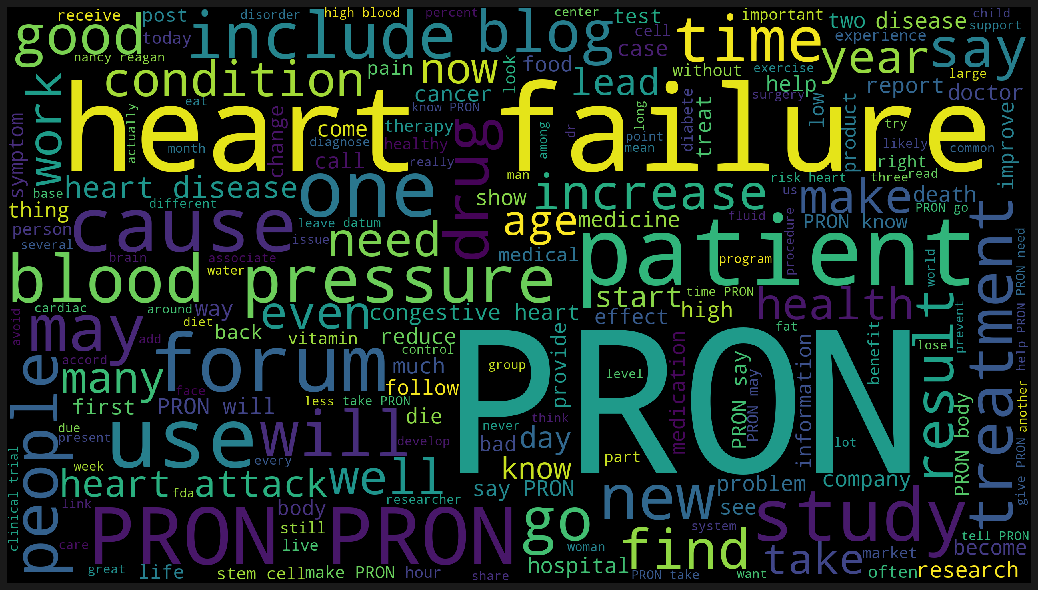

In [32]:
text = ' '.join(X_train['Combined_CONV_text'])
# text
wordcloud = WordCloud(width=2560, height=1440).generate(text)

barplot_dim = (20, 8)
ax = plt.subplots(figsize=barplot_dim, facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## 5. Modelling  
Let us for now consider using the actual conversation as a feature for the sake of simplicity. We can revisit the forum features afterwards if our predictors are not that strong.

In [41]:
X_train = X_train['Combined_CONV_text']
X_valid = X_valid['Combined_CONV_text']
X_test = X_test['Combined_CONV_text']

This is a very basic function to rate the performance of our various models so that we can have a benchmark of their performance.

In [42]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

def rate_model(predictions, y_valid=y_valid):
    roc = roc_auc_score(y_valid, predictions)
    acc = accuracy_score(y_valid, predictions)
    precision_recall_fscore = precision_recall_fscore_support(y_valid, predictions, average='weighted')
    print(f'ROC: {roc}\nAccuracy: {acc}\nPrecision: {precision_recall_fscore[0]}\nRecall: {precision_recall_fscore[1]}\nF-Score: {precision_recall_fscore[2]}')

### A. Logistic Regression  
Started with a very basic model for the sake of simplicity and speed. This will establish a baseline score for our sucessive models.

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

We will use a very basic Vectorizer in the beginning and gradually move towards more complex ones; again for the sake of simplicity.

In [44]:
tfv = TfidfVectorizer(min_df=3,  max_features=None, strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
                      ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1, stop_words = 'english')

tfv.fit(list(X_train) + list(X_valid))
xtrain_tfv =  tfv.transform(X_train) 
xvalid_tfv = tfv.transform(X_valid)

In [45]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=1.0)
clf.fit(xtrain_tfv, y_train)
predictions = clf.predict(xvalid_tfv)

rate_model(predictions)

ROC: 0.5416666666666666
Accuracy: 0.8097982708933718
Precision: 0.8466115087849772
Recall: 0.8097982708933718
F-Score: 0.739517686924027


In [46]:
ctv = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1, 3), stop_words = 'english')

ctv.fit(list(X_train) + list(X_valid))
xtrain_ctv =  ctv.transform(X_train)  
xvalid_ctv = ctv.transform(X_valid)

In [47]:
clf = LogisticRegression(C=1.0)
clf.fit(xtrain_ctv, y_train)
predictions = clf.predict(xvalid_ctv)

rate_model(predictions)

ROC: 0.7257070707070706
Accuracy: 0.8414985590778098
Precision: 0.8325867538275343
Recall: 0.8414985590778098
F-Score: 0.8354639293527883


C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


We also can gaze into the performance of pre-trained vectors from Spacy library.

In [48]:
document = nlp.pipe(X_train)
xtrain_stv = np.array([text.vector for text in document])
document = nlp.pipe(X_valid)
xvalid_stv = np.array([text.vector for text in document])

In [49]:
clf = LogisticRegression(C=1.0)
clf.fit(xtrain_stv, y_train)
predictions = clf.predict(xvalid_stv)

rate_model(predictions)

ROC: 0.8250757575757577
Accuracy: 0.8933717579250721
Precision: 0.8910114413523161
Recall: 0.8933717579250721
F-Score: 0.8919342911837678


Okay, so best Vectorizers are CountVectorizer and Spacy-Vectors.  
We will use only those two to comapre between different models.

### B. Naive Bayes

In [50]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(xtrain_tfv, y_train)
predictions = clf.predict(xvalid_tfv)

rate_model(predictions)

ROC: 0.5277777777777778
Accuracy: 0.8040345821325648
Precision: 0.842884869056721
Recall: 0.8040345821325648
F-Score: 0.7271471115044542


In [51]:
clf.fit(xtrain_ctv, y_train)
predictions = clf.predict(xvalid_ctv)

rate_model(predictions)

ROC: 0.809570707070707
Accuracy: 0.7550432276657061
Precision: 0.8596282369379505
Recall: 0.7550432276657061
F-Score: 0.7773351621252585


Unfortunately we can not use Spacy vectors with Naive Bayes as it can not take negative vectors into account.

### C. KNN

In [52]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(xtrain_ctv, y_train)
predictions = clf.predict(xvalid_ctv)

rate_model(predictions)

ROC: 0.5627020202020202
Accuracy: 0.6887608069164265
Precision: 0.7101128523377658
Recall: 0.6887608069164265
F-Score: 0.6984851941365656


In [53]:
clf.fit(xtrain_stv, y_train)
predictions = clf.predict(xvalid_stv)

rate_model(predictions)

ROC: 0.8603030303030303
Accuracy: 0.8760806916426513
Precision: 0.8921668659150648
Recall: 0.8760806916426513
F-Score: 0.8810859705124454


### D. SVM

In [54]:
from sklearn.decomposition import TruncatedSVD
from sklearn import preprocessing

svd = TruncatedSVD(n_components=200)
svd.fit(xtrain_ctv)
xtrain_svd = svd.transform(xtrain_ctv)
xvalid_svd = svd.transform(xvalid_ctv)

scl = preprocessing.StandardScaler()
scl.fit(xtrain_svd)
xtrain_svd_scl_ctv = scl.transform(xtrain_svd)
xvalid_svd_scl_ctv = scl.transform(xvalid_svd)

In [55]:
from sklearn.svm import SVC

clf = SVC(C=1.0)
clf.fit(xtrain_svd_scl_ctv, y_train)
predictions = clf.predict(xvalid_svd_scl_ctv)

rate_model(predictions)

ROC: 0.5527525252525253
Accuracy: 0.7867435158501441
Precision: 0.7379395258786056
Recall: 0.7867435158501441
F-Score: 0.7419881834742128


In [56]:
svd = TruncatedSVD(n_components=120)
svd.fit(xtrain_stv)
xtrain_svd = svd.transform(xtrain_stv)
xvalid_svd = svd.transform(xvalid_stv)

scl = preprocessing.StandardScaler()
scl.fit(xtrain_svd)
xtrain_svd_scl_stv = scl.transform(xtrain_svd)
xvalid_svd_scl_stv = scl.transform(xvalid_svd)

In [57]:
clf = SVC(C=1.0)
clf.fit(xtrain_svd_scl_stv, y_train)
predictions = clf.predict(xvalid_svd_scl_stv)

rate_model(predictions)

ROC: 0.8202777777777778
Accuracy: 0.9020172910662824
Precision: 0.8984486238439988
Recall: 0.9020172910662824
F-Score: 0.8986096103123598


### E. Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100,
                             random_state=0,
                             n_jobs=-1)
clf.fit(xtrain_ctv, y_train)
predictions = clf.predict(xvalid_ctv)

rate_model(predictions)

ROC: 0.5347222222222222
Accuracy: 0.8069164265129684
Precision: 0.8447427406171528
Recall: 0.8069164265129684
F-Score: 0.7333960020801155


In [59]:
clf.fit(xtrain_stv, y_train)
predictions = clf.predict(xvalid_stv)

rate_model(predictions)

ROC: 0.8130050505050505
Accuracy: 0.8904899135446686
Precision: 0.8869601633384588
Recall: 0.8904899135446686
F-Score: 0.888054047189822


In [60]:
clf.fit(xtrain_svd_scl_ctv, y_train)
predictions = clf.predict(xvalid_svd_scl_ctv)

rate_model(predictions)

ROC: 0.6762626262626262
Accuracy: 0.8443804034582133
Precision: 0.8325477104529321
Recall: 0.8443804034582133
F-Score: 0.824860124676555


In [61]:
clf.fit(xtrain_svd_scl_stv, y_train)
predictions = clf.predict(xvalid_svd_scl_stv)

rate_model(predictions)

ROC: 0.6765909090909091
Accuracy: 0.8530259365994236
Precision: 0.8486981639297211
Recall: 0.8530259365994236
F-Score: 0.8305966179742374


### F. XGBoost

In [62]:
import xgboost as xgb

clf = xgb.XGBClassifier(max_depth=7,
                        n_estimators=200,
                        colsample_bytree=0.8,
                        subsample=0.8,
                        nthread=-1,
                        learning_rate=0.1)

clf.fit(xtrain_ctv, y_train)
predictions = clf.predict(xvalid_ctv)

rate_model(predictions)

ROC: 0.7782828282828284
Accuracy: 0.8760806916426513
Precision: 0.8701982828332165
Recall: 0.8760806916426513
F-Score: 0.871362708403089


In [63]:
clf.fit(xtrain_stv, y_train)
predictions = clf.predict(xvalid_stv)

rate_model(predictions)

ROC: 0.8356565656565658
Accuracy: 0.9020172910662824
Precision: 0.8995801700017808
Recall: 0.9020172910662824
F-Score: 0.9004159158577161


In [64]:
clf.fit(xtrain_svd_scl_ctv, y_train)
predictions = clf.predict(xvalid_svd_scl_ctv)

rate_model(predictions)

ROC: 0.7903535353535353
Accuracy: 0.8789625360230547
Precision: 0.8741545692808764
Recall: 0.8789625360230547
F-Score: 0.8755269043829841


In [65]:
clf.fit(xtrain_svd_scl_stv, y_train)
predictions = clf.predict(xvalid_svd_scl_stv)

rate_model(predictions)

ROC: 0.8528535353535354
Accuracy: 0.9048991354466859
Precision: 0.904427210634647
Recall: 0.9048991354466859
F-Score: 0.904652913366439


## 6. Hyper-Parameter Tuning

Out of all the classical machine learning models using the default hyper-parameters, the Ranking goes like:-  
1. XGBoost  
2. Logistic Regression  
3. SVM  
4. KNN  
5. Multinomial NB  
6. Random Forest  
  
Let us do hyper-parameter tuning for the Top-3 methods and see how far can we go. We will use a conjunction of RandomizedsearchCV & GridsearchCV because of the ease of use and taking advantage of the parallel processing feature.

### 1.KNN

In [66]:
from hyperopt import fmin, tpe, hp, anneal, Trials, STATUS_OK
from sklearn.model_selection import KFold, cross_val_score

random_state = 0
n_iter = 200
cross_val_kf = KFold(n_splits=3, shuffle=True, random_state=random_state)

def hyperopt_train_test(params, cv=cross_val_kf, X=xtrain_stv, y=y_train):
    clf = KNeighborsClassifier(**params)
    return cross_val_score(clf, X, y, cv=cv, scoring='recall', n_jobs=-1).mean()

def call_hyperopt(params):
    acc = hyperopt_train_test(params)
    return {'loss': -acc, 'status': STATUS_OK}

space4lr = {'n_neighbors': hp.choice('n_neighbors', np.arange(1, 9, dtype=int)), 
            'p': hp.choice('p', [1, 2]),
            'weights': hp.choice('weights', ['uniform', 'distance'])}

trials = Trials()
# best = fmin(fn = call_hyperopt, space = space4lr, algo = tpe.suggest, max_evals = n_iter, trials = trials)

In [67]:
# print(best)

**Output:-**  
{'n_neighbors': 6, 'p': 0, 'weights': 1}

In [68]:
clf = KNeighborsClassifier(n_neighbors = 6,
                           p = 1,
                           weights = 'distance')
clf.fit(xtrain_stv, y_train)
predictions = clf.predict(xvalid_stv)

rate_model(predictions)

ROC: 0.8917171717171717
Accuracy: 0.8933717579250721
Precision: 0.9103370886857047
Recall: 0.8933717579250721
F-Score: 0.8980407519241598


**Output:-**  
ROC: 0.8917171717171717  
Accuracy: 0.8933717579250721  
Precision: 0.9103370886857047  
Recall: 0.8933717579250721  
F-Score: 0.8980407519241598

### 2. SVM

In [69]:
n_iter = 200
cross_val_kf = KFold(n_splits=3, shuffle=True, random_state=random_state)

def hyperopt_train_test(params, cv=cross_val_kf, X=xtrain_svd_scl_ctv, y=y_train):
    clf = SVC(**params)
    return cross_val_score(clf, X, y, cv=cv, scoring='recall', n_jobs=-1).mean()

def call_hyperopt(params):
    acc = hyperopt_train_test(params)
    return {'loss': -acc, 'status': STATUS_OK}

space4svc = {'C': hp.uniform('C', 0.01, 100),
             'gamma': hp.uniform('gamma', 0, 20),
             'kernel': hp.choice('kernel', ['rbf', 'poly', 'sigmoid', 'linear']),
             'degree': hp.choice('degree', np.arange(1, 9, dtype=int))}

trials = Trials()
# best = fmin(fn = call_hyperopt, space = space4svc, algo = tpe.suggest, max_evals = n_iter, trials = trials)

In [70]:
# print(best)

In [71]:
clf = SVC(C = 93.85137469727562,
          degree = 2,
          gamma = 4.431204779614404,
          kernel = 'linear')

clf.fit(xtrain_svd_scl_ctv, y_train)
predictions = clf.predict(xvalid_svd_scl_ctv)

rate_model(predictions)

ROC: 0.7984595959595959
Accuracy: 0.8674351585014409
Precision: 0.8674351585014409
Recall: 0.8674351585014409
F-Score: 0.8674351585014409


**Output:-**  
ROC: 0.8331818181818182  
Accuracy: 0.8818443804034583  
Precision: 0.8851878189053983  
Recall: 0.8818443804034583  
F-Score: 0.8832848589872965

In [72]:
n_iter = 400
cross_val_kf = KFold(n_splits=3, shuffle=True, random_state=random_state)

def hyperopt_train_test(params, cv=cross_val_kf, X=xtrain_svd_scl_stv, y=y_train):
    clf = SVC(**params)
    return cross_val_score(clf, X, y, cv=cv, scoring='recall', n_jobs=-1).mean()

def call_hyperopt(params):
    acc = hyperopt_train_test(params)
    return {'loss': -acc, 'status': STATUS_OK}

space4svc = {'C': hp.uniform('C', 0.01, 100),
             'gamma': hp.uniform('gamma', 0, 20),
             'kernel': hp.choice('kernel', ['rbf', 'poly', 'sigmoid', 'linear']),
             'degree': hp.choice('degree', np.arange(1, 9, dtype=int))}

trials = Trials()
# best = fmin(fn = call_hyperopt, space = space4svc, algo = tpe.suggest, max_evals = n_iter, trials = trials)

In [73]:
# print(best)

In [74]:
clf = SVC(C = 0.15675181364374047,
          degree = 4,
          gamma = 16.729659075292133,
          kernel = 'linear')

clf.fit(xtrain_svd_scl_stv, y_train)
predictions = clf.predict(xvalid_svd_scl_stv)

rate_model(predictions)

ROC: 0.8452525252525251
Accuracy: 0.8847262247838616
Precision: 0.8902610929421795
Recall: 0.8847262247838616
F-Score: 0.8869090162159016


**Output:-**  
ROC: 0.7776262626262626  
Accuracy: 0.8587896253602305  
Precision: 0.8567163560218108  
Recall: 0.8587896253602305  
F-Score: 0.857670417281442

### 3. XGBoost

In [75]:
n_iter = 200
cross_val_kf = KFold(n_splits=3, shuffle=True, random_state=random_state)

def hyperopt_train_test(params, cv=cross_val_kf, X=xtrain_stv, y=y_train):
    clf = xgb.XGBClassifier(max_depth = params['max_depth'],
                            n_estimators = params['n_estimators'],
                            learning_rate = params['learning_rate'],
                            colsample_bytree = params['colsample_bytree'],
                            subsample = params['subsample'],
                            nthread = -1)
    return cross_val_score(clf, X, y, cv=cv, scoring='recall', n_jobs=-1).mean()

def call_hyperopt(params):
    acc = hyperopt_train_test(params)
    return {'loss': -acc, 'status': STATUS_OK}

space4xgb = {'max_depth': hp.choice('max_depth', np.arange(1, 15, dtype=int)),
             'n_estimators': hp.choice('n_estimators', np.arange(2, 500, dtype=int)),
             'colsample_bytree': hp.uniform('colsample_bytree', 0.1, 0.99),
             'subsample': hp.uniform('subsample', 0.1, 0.99),
             'learning_rate': hp.uniform('learning_rate', 0.001, 2)}

trials = Trials()
# best = fmin(fn = call_hyperopt, space = space4xgb, algo = tpe.suggest, max_evals = n_iter, trials = trials)

In [76]:
# print(best)

In [77]:
clf = xgb.XGBClassifier(max_depth = 4,
                        n_estimators = 275,
                        learning_rate = 0.9764553658052625,
                        colsample_bytree = 0.14113098403598756,
                        subsample = 0.985117567309606,
                        nthread = -1)

clf.fit(xtrain_stv, y_train)
predictions = clf.predict(xvalid_stv)

rate_model(predictions)

ROC: 0.821439393939394
Accuracy: 0.8876080691642652
Precision: 0.8860057925342473
Recall: 0.8876080691642652
F-Score: 0.8867172708974743


In [78]:
n_iter = 100
cross_val_kf = KFold(n_splits=3, shuffle=True, random_state=random_state)

def hyperopt_train_test(params, cv=cross_val_kf, X=xtrain_svd_scl_stv, y=y_train):
    clf = xgb.XGBClassifier(max_depth = params['max_depth'],
                            n_estimators = params['n_estimators'],
                            learning_rate = params['learning_rate'],
                            colsample_bytree = params['colsample_bytree'],
                            subsample = params['subsample'],
                            nthread = -1)
    return cross_val_score(clf, X, y, cv=cv, scoring='recall', n_jobs=-1).mean()

def call_hyperopt(params):
    acc = hyperopt_train_test(params)
    return {'loss': -acc, 'status': STATUS_OK}

space4xgb = {'max_depth': hp.choice('max_depth', np.arange(1, 15, dtype=int)),
             'n_estimators': hp.choice('n_estimators', np.arange(2, 500, dtype=int)),
             'colsample_bytree': hp.uniform('colsample_bytree', 0.1, 0.99),
             'subsample': hp.uniform('subsample', 0.1, 0.99),
             'learning_rate': hp.uniform('learning_rate', 0.001, 2)}

trials = Trials()
# best = fmin(fn = call_hyperopt, space = space4xgb, algo = tpe.suggest, max_evals = n_iter, trials = trials)

In [79]:
# print(best)

In [80]:
clf = xgb.XGBClassifier(max_depth = 3,
                        n_estimators = 74,
                        learning_rate = 0.16607167388934393,
                        colsample_bytree = 0.6239160320889967,
                        subsample = 0.8926049223466814,
                        nthread = -1)

clf.fit(xtrain_svd_scl_stv, y_train)
predictions = clf.predict(xvalid_svd_scl_stv)

rate_model(predictions)

ROC: 0.8649242424242424
Accuracy: 0.9077809798270894
Precision: 0.9087883842927071
Recall: 0.9077809798270894
F-Score: 0.9082443340680342


## 7. Deep Learning  
Although we are doing good with the classical machine learning methods; let's see if we can do better by using RNNs.

In [81]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM, BatchNormalization, Flatten, Bidirectional
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import time
from keras_tqdm import TQDMNotebookCallback

Using TensorFlow backend.


In [82]:
print(tf.__version__)

2.0.0


In [83]:
X_train, X_valid, y_train, y_valid = train_test_split(training_data.drop('Patient_Tag', axis=1), training_data['Patient_Tag'],
                                                      test_size=0.3, random_state=0, stratify=training_data['Patient_Tag'],
                                                      shuffle=True)

In [84]:
X_test = test_data

In [85]:
X_train['Combined_CONV_text'] = X_train['Combined_CONV_text'].apply(lambda x: prepare_text(x))
X_valid['Combined_CONV_text'] = X_valid['Combined_CONV_text'].apply(lambda x: prepare_text(x))
X_test['Combined_CONV_text'] = X_test['Combined_CONV_text'].apply(lambda x: prepare_text(x))

In [86]:
# X_train['Combined_CONV_text'] = X_train['Combined_CONV_text'].apply(lambda x: remove_stop_words(x))
# X_valid['Combined_CONV_text'] = X_valid['Combined_CONV_text'].apply(lambda x: remove_stop_words(x))
# X_test['Combined_CONV_text'] = X_test['Combined_CONV_text'].apply(lambda x: remove_stop_words(x))

In [87]:
X_train['Combined_CONV_text'] = X_train['Combined_CONV_text'].apply(lambda x: lemmatizer(x))
X_valid['Combined_CONV_text'] = X_valid['Combined_CONV_text'].apply(lambda x: lemmatizer(x))
X_test['Combined_CONV_text'] = X_test['Combined_CONV_text'].apply(lambda x: lemmatizer(x))

In [88]:
X_train = X_train['Combined_CONV_text'].values
X_valid = X_valid['Combined_CONV_text'].values
X_test = X_test['Combined_CONV_text'].values

y_train = y_train.values
y_valid = y_valid.values

In [89]:
embed_size = 300
max_features = 17600
maxlen = 100

In [90]:
tokenizer = Tokenizer(oov_token = '<OOV>', num_words = max_features)
tokenizer.fit_on_texts(list(X_train))

X_train = tokenizer.texts_to_sequences(X_train)
X_valid = tokenizer.texts_to_sequences(X_valid)
X_test = tokenizer.texts_to_sequences(X_test)

In [91]:
X_train = pad_sequences(X_train, maxlen=maxlen, padding='post')
X_valid = pad_sequences(X_valid, maxlen=maxlen, padding='post')
X_test = pad_sequences(X_test, maxlen=maxlen, padding='post')

In [92]:
NUM_EPOCHS = 30
BATCH_SIZE = 16
lr = 0.006

In [93]:
model1 = Sequential()
model1.add(Embedding(max_features, embed_size, input_length=maxlen))
# model1.add(Bidirectional(LSTM(32, return_sequences=True)))
model1.add(Bidirectional(LSTM(64)))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 300)          5280000   
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               186880    
_________________________________________________________________
dense (Dense)                (None, 32)                4128      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 5,471,041
Trainable params: 5,471,041
Non-trainable params: 0
_________________________________________________________________


In [94]:
model1.compile(loss = 'binary_crossentropy',
               optimizer = Adam(lr=lr),
               metrics = ['Recall'])

In [95]:
NAME = f'LSTM_Clf_{embed_size}_Embeddings_{max_features}_Features_{maxlen}_Maxlen_{BATCH_SIZE}_Batch_Size{int(time.time())}'
tensorboard = TensorBoard(log_dir= 'logs\{}'.format(NAME))
earlystop_callback = EarlyStopping(monitor='val_Recall',
                                   min_delta=0.0001,
                                   patience=3)

callbacks_list = [tensorboard, earlystop_callback, TQDMNotebookCallback()]
# callbacks_list = [tensorboard, TQDMNotebookCallback()]

In [96]:
history = model1.fit(X_train, y_train,
                     epochs=NUM_EPOCHS,
                     validation_data=(X_valid, y_valid),
                     batch_size=BATCH_SIZE,
                     callbacks=callbacks_list,
                     verbose=0)

In [97]:
probas = model1.predict(X_valid)
labels = (probas > 0.4).astype(np.int)
rate_model(labels)

ROC: 0.7523232323232323
Accuracy: 0.8674351585014409
Precision: 0.8596518836902034
Recall: 0.8674351585014409
F-Score: 0.8600667405006407


In [98]:
# NUM_EPOCHS = 50
# possible_batch_size = np.linspace(5, 50, 5).astype(int)
# possible_lr = np.logspace(-3, -1, 8)

In [99]:
# earlystop_callback = EarlyStopping(monitor='val_Recall',
#                                    min_delta=0.0001,
#                                    patience=5)

# for BATCH_SIZE in possible_batch_size:
#     for lr in possible_lr:
#         model1 = Sequential()
#         model1.add(Embedding(max_features, embed_size, input_length=maxlen))
#         model1.add(Bidirectional(LSTM(64)))
#         model1.add(Dense(32, activation='relu'))
#         model1.add(Dense(1, activation='sigmoid'))

#         model1.compile(loss = 'binary_crossentropy',
#                        optimizer = Adam(lr=lr),
#                        metrics = ['Recall'])
        
#         NAME = f'LSTM_Clf_{BATCH_SIZE}_Batch_Size_{int(lr*1000)}_lr_{int(time.time())}'
#         tensorboard = TensorBoard(log_dir= 'logs\{}'.format(NAME))

#         callbacks_list = [tensorboard, earlystop_callback, TQDMNotebookCallback()]
        
#         history = model1.fit(X_train, y_train,
#                              epochs=NUM_EPOCHS,
#                              validation_data=(X_valid, y_valid),
#                              batch_size=BATCH_SIZE,
#                              callbacks=callbacks_list,
#                              verbose=0)

In [100]:
# import io

# e = model1.layers[0]
# weights = e.get_weights()[0]

# word_index = tokenizer.word_index
# reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
# out_m = io.open('mets.tsv', 'w', encoding='utf-8')

# for word_num in range(1, len(word_index)):
#     word = reverse_word_index[word_num]
#     embeddings = weights[word_num]
#     out_m.write(word + '\n')
#     out_v.write('\t'.join([str(x) for x in embeddings]) + '\n')
# out_m.close()
# out_v.close()

## 8. Transfer Learning  
Spacy also has a transfer learning model; which we can use for our classification task. Let's see how that performs as well.

In [101]:
X_train, X_valid, y_train, y_valid = train_test_split(training_data.drop('Patient_Tag', axis=1), training_data['Patient_Tag'],
                                                      test_size=0.3, random_state=0, stratify=training_data['Patient_Tag'],
                                                      shuffle=True)
X_test = test_data

X_train['Combined_CONV_text'] = X_train['Combined_CONV_text'].apply(lambda x: prepare_text(x))
X_valid['Combined_CONV_text'] = X_valid['Combined_CONV_text'].apply(lambda x: prepare_text(x))
X_test['Combined_CONV_text'] = X_test['Combined_CONV_text'].apply(lambda x: prepare_text(x))

# X_train['Combined_CONV_text'] = X_train['Combined_CONV_text'].apply(lambda x: remove_stop_words(x))
# X_valid['Combined_CONV_text'] = X_valid['Combined_CONV_text'].apply(lambda x: remove_stop_words(x))
# X_test['Combined_CONV_text'] = X_test['Combined_CONV_text'].apply(lambda x: remove_stop_words(x))

X_train['Combined_CONV_text'] = X_train['Combined_CONV_text'].apply(lambda x: lemmatizer(x))
X_valid['Combined_CONV_text'] = X_valid['Combined_CONV_text'].apply(lambda x: lemmatizer(x))
X_test['Combined_CONV_text'] = X_test['Combined_CONV_text'].apply(lambda x: lemmatizer(x))

In [102]:
X_train['Spacy_tuples'] = tuple(zip(X_train['Combined_CONV_text'], y_train))
train = X_train['Spacy_tuples'].tolist()

X_valid['Spacy_tuples'] = tuple(zip(X_valid['Combined_CONV_text'], y_valid))
valid = X_valid['Spacy_tuples'].tolist()

In [103]:
import spacy
import random
n_iter = 10

nlp = spacy.load('en_core_web_md')
random_seed = 15

In [104]:
def load_data(train=train, random_seed=random_seed):
    # Partition off part of the train data for evaluation
    train_data = train
    random.seed(random_seed)
    random.shuffle(train_data)
    texts, labels = zip(*train_data)
    cats = [{'PATIENT': bool(y), 'NOT_PATIENT': not bool(y)} for y in labels]
    return (texts, cats)

In [105]:
if 'textcat' not in nlp.pipe_names:
    textcat = nlp.create_pipe('textcat', config={'exclusive_classes': True,
                                                 'architecture': 'simple_cnn'})
    nlp.add_pipe(textcat, last=True)
# otherwise, get it, so we can add labels to it
else:
    textcat = nlp.get_pipe('textcat')
    
textcat.add_label('PATIENT')
textcat.add_label('NOT_PATIENT')

(train_texts, train_cats) = load_data()
train_data = list(zip(train_texts, [{'cats': cats} for cats in train_cats]))

In [106]:
from spacy.util import minibatch, compounding

pipe_exceptions = ["textcat", "trf_wordpiecer", "trf_tok2vec"]
other_pipes = [pipe for pipe in nlp.pipe_names if pipe not in pipe_exceptions]

with nlp.disable_pipes(*other_pipes):  # only train textcat
    optimizer = nlp.begin_training()
    
    print("Training the model...")
    print("{:^5}".format("LOSS"))
    batch_sizes = 20
    
    for i in range(n_iter):
        losses = {}
        batches = minibatch(train_data, size=batch_sizes)
        for batch in batches:
            texts, annotations = zip(*batch)
            nlp.update(texts, annotations, sgd=optimizer, drop=0.3, losses=losses)
        #with textcat.model.use_params(optimizer.averages):
            #evaluate on the dev data split off in load_data()
            #scores = evaluate(nlp.tokenizer, textcat, dev_texts, dev_cats)
        print("{0:.3f}".format(losses["textcat"]))

Training the model...
LOSS 
0.031
0.021
0.016
0.013
0.007
0.005
0.006
0.005
0.004
0.004


In [107]:
def predict_tag(text, nlp=nlp, threshold=0.5):
    doc = nlp(text)
    percent = round(doc.cats['PATIENT'], 2)
    
    if percent>threshold:
        return 1
    else:
        return 0

In [108]:
preds = X_valid['Combined_CONV_text'].apply(lambda x: predict_tag(text=x, threshold=0.2))

In [109]:
rate_model(preds)

ROC: 0.795479797979798
Accuracy: 0.8789625360230547
Precision: 0.8748752558527917
Recall: 0.8789625360230547
F-Score: 0.8762702626834874


### A. Threshold Tuning

In [110]:
threshold_list = [x for x in np.linspace(start = 0, stop = 1, num = 11)]
roc_list = []
accuracy_list = []
precision_list = []
recall_list = []
f_score_list = []

for thres in threshold_list:
    print(f'Round: {round(thres, 1)}')
    preds = X_valid['Combined_CONV_text'].apply(lambda x: predict_tag(text=x, threshold=thres))
    roc_list.append(roc_auc_score(y_valid, preds))
    accuracy_list.append(accuracy_score(y_valid, preds))
    precision_recall_fscore = precision_recall_fscore_support(y_valid, preds, average='weighted')
    precision_list.append(precision_recall_fscore[0])
    recall_list.append(precision_recall_fscore[1])
    f_score_list.append(precision_recall_fscore[2])

Round: 0.0
Round: 0.1
Round: 0.2
Round: 0.3
Round: 0.4
Round: 0.5
Round: 0.6
Round: 0.7
Round: 0.8
Round: 0.9
Round: 1.0


C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [111]:
plot_df = pd.DataFrame()
plot_df['Thereshold'] = np.array(threshold_list)
plot_df['ROC'] = np.array(roc_list)
plot_df['Accuracy'] = np.array(accuracy_list)
plot_df['Precision'] = np.array(precision_list)
plot_df['Recall'] = np.array(recall_list)
plot_df['F-Score'] = np.array(f_score_list)

In [112]:
melt_df = plot_df.melt('Thereshold', var_name='Metrics',  value_name='Values')

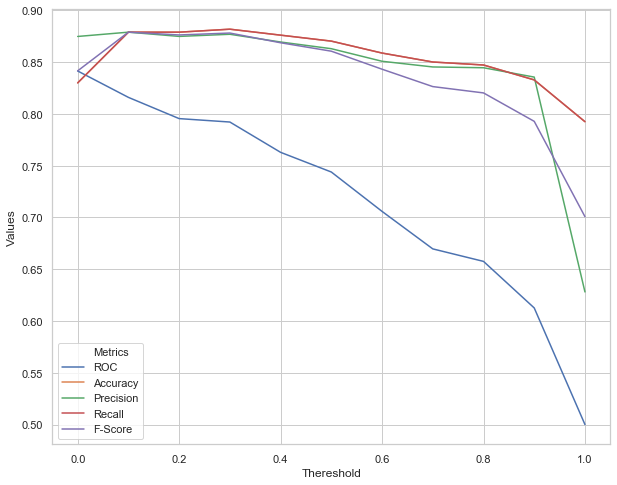

In [113]:
barplot_dim = (10, 8)
ax = plt.subplots(figsize=barplot_dim)
sns.lineplot(x='Thereshold', y='Values', hue='Metrics', data=melt_df)

In [114]:
threshold = threshold_list[recall_list.index(max(recall_list))]

X_valid['Preds'] = X_valid['Combined_CONV_text'].apply(lambda x: predict_tag(text=x, threshold=threshold))

roc = roc_auc_score(y_valid, X_valid['Preds'])
acc = accuracy_score(y_valid, X_valid['Preds'])
precision_recall_fscore = precision_recall_fscore_support(y_valid, X_valid['Preds'], average='weighted')
print(f'Best Threshold: {threshold}\nROC: {roc}\nAccuracy: {acc}\nPrecision: {precision_recall_fscore[0]}\n\
Recall: {precision_recall_fscore[1]}\nF-Score: {precision_recall_fscore[2]}')

Best Threshold: 0.30000000000000004
ROC: 0.7921717171717172
Accuracy: 0.8818443804034583
Precision: 0.8769310719516228
Recall: 0.8818443804034583
F-Score: 0.8781166341859055


So after a lot of tweaking around with the number of pochs and batch sizes this is the summary. I have also highlighted the best ones.

![alt text](Iterations_and_Threshold_Tuning.jpg 'Iterations and_Threshold Tuning Summary')

## 9. Full Training

In [115]:
import spacy
nlp = spacy.load('en_core_web_lg')
n_iter = 7

full_train_data = X_train.append(X_valid, sort=False)
train_full = full_train_data['Spacy_tuples'].tolist()

if 'textcat' not in nlp.pipe_names:
    textcat = nlp.create_pipe('textcat', config={'exclusive_classes': True,
                                                 'architecture': 'simple_cnn'})
    nlp.add_pipe(textcat, last=True)
else:
    textcat = nlp.get_pipe('textcat')
    
textcat.add_label('PATIENT')
textcat.add_label('NOT_PATIENT')

(train_texts, train_cats) = load_data(train=train_full)
train_data = list(zip(train_texts, [{'cats': cats} for cats in train_cats]))

In [116]:
pipe_exceptions = ["textcat", "trf_wordpiecer", "trf_tok2vec"]
other_pipes = [pipe for pipe in nlp.pipe_names if pipe not in pipe_exceptions]

with nlp.disable_pipes(*other_pipes):  # only train textcat
    optimizer = nlp.begin_training()
    
    print("Training the model...")
    print("{:^5}".format("LOSS"))
    batch_sizes = 10
    
    for i in range(n_iter):
        losses = {}
        batches = minibatch(train_data, size=batch_sizes)
        for batch in batches:
            texts, annotations = zip(*batch)
            nlp.update(texts, annotations, sgd=optimizer, drop=0.2, losses=losses)
        print("{0:.3f}".format(losses["textcat"]))

Training the model...
LOSS 
0.293
0.201
0.147
0.105
0.068
0.030
0.012


## 10. Making Predictions

In [117]:
def predict_tag(text, nlp=nlp, threshold=0.5):
    doc = nlp(text)
    percent = round(doc.cats['PATIENT'], 2)
    
    if percent>threshold:
        return 1
    else:
        return 0

In [118]:
y_test = X_test['Combined_CONV_text'].apply(lambda x: predict_tag(text=x, threshold=0.6)).to_numpy()

output = pd.DataFrame({'Index': X_test.index,
                       'Patient_Tag': y_test})
output.to_csv('submission.csv', index=False)

So we can see that the naturally the BiLSTM deep learning model from Spacy has performed a little bit bityter than our classical machine learning models. However, honourable mention to XGBoost for living upto it's name and almost matching the RNN model. Finally the RNN model was chosen based on its complex construct and ability to perform generally better than any classical Machine Learning model.